In [3]:
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

# CONSTITUTION DE LA DONNEE

In [46]:
# Charger les datasets
elections_2020 = pd.read_csv('./data/2020_US_County_Level_Presidential_Results.csv')
elections_08_16 = pd.read_csv('./data/US_County_Level_Presidential_Results_08-16.csv')
population = pd.read_excel('./data/PopulationEstimates.xls', engine='xlrd', header=2)
education = pd.read_excel('./data/Education.xls', engine='xlrd', header=4)
poverty = pd.read_excel('./data/PovertyEstimates.xls', engine='xlrd', header=4)
unemployment = pd.read_excel('./data/Unemployment.xls', engine='xlrd', header=4)

# Harmoniser les colonnes
df_2020 = elections_2020[['county_fips', 'county_name', 'state_name']].rename(
    columns={'county_fips': 'fips', 'county_name': 'county_name', 'state_name': 'state_name'})

df_08_16 = elections_08_16[['fips_code', 'county']].rename(
    columns={'fips_code': 'fips', 'county': 'county_name'})

df_population = population[['FIPStxt', 'Area_Name', 'State']].rename(
    columns={'FIPStxt': 'fips', 'Area_Name': 'county_name', 'State': 'state_code'})

df_education = education[['FIPS Code', 'Area name', 'State']].rename(
    columns={'FIPS Code': 'fips', 'Area name': 'county_name', 'State': 'state_code'})

df_poverty = poverty[['FIPStxt', 'Area_name', 'Stabr']].rename(
    columns={'FIPStxt': 'fips', 'Area_name': 'county_name', 'Stabr': 'state_code'})

df_unemployment = unemployment[['fips_txt', 'area_name', 'Stabr']].rename(
    columns={'fips_txt': 'fips', 'area_name': 'county_name', 'Stabr': 'state_code'})

# Concaténer les données
all_data = pd.concat([
    df_2020,
    df_08_16,
    df_population,
    df_education,
    df_poverty,
    df_unemployment
], ignore_index=True)

# Harmoniser la colonne fips en 5 caractères
all_data['fips'] = all_data['fips'].astype(str).str.zfill(5)

# Supprimer les doublons
all_data_unique = all_data.drop_duplicates(subset=['fips']).sort_values(by='fips').reset_index(drop=True)

# Vérifier les colonnes finales
print(all_data_unique.head())

# Sauvegarder dans un fichier Excel
all_data_unique.to_excel('datamap_0.xlsx', index=False)
print("\nDonnées harmonisées sauvegardées dans 'datamap_0.xlsx'.")


    fips     county_name state_name state_code
0  00000   United States        NaN         US
1  01000         Alabama        NaN         AL
2  01001  Autauga County    Alabama        NaN
3  01003  Baldwin County    Alabama        NaN
4  01005  Barbour County    Alabama        NaN

Données harmonisées sauvegardées dans 'datamap_0.xlsx'.


In [47]:
dm0 = pd.read_excel('datamap_0.xlsx')

# Liste des sources et leur priorité
sources = [df_2020, df_08_16, df_population, df_education, df_poverty, df_unemployment]

# Ajouter les colonnes manquantes dans harmonized_data
columns_to_fill = ['county_name', 'state_code', 'state_name']
for col in columns_to_fill:
    if col not in dm0.columns:
        dm0[col] = pd.NA

# Fonction pour combler les valeurs manquantes
def fill_missing_values(base_df, sources, columns_to_fill):
    for source in sources:
        for col in columns_to_fill:
            if col in source.columns:  # Vérifier que la colonne existe dans la source
                base_df[col] = base_df[col].fillna(
                    base_df['fips'].map(source.set_index('fips')[col])  # Remplir selon la clé fips
                )
    return base_df

# Compléter les colonnes manquantes
dm1_raw = fill_missing_values(dm0, sources, columns_to_fill)

# Vérification des valeurs manquantes
missing_data = dm1_raw[columns_to_fill].isnull().sum()
print(f"Valeurs manquantes après remplissage :\n{missing_data}")

# Sauvegarder les données complètes
dm1_raw.to_excel('datamap_1.xlsx', index=False)
print("\nDonnées complétées sauvegardées dans 'datamap_1.xlsx'.")


Valeurs manquantes après remplissage :
county_name      0
state_code      41
state_name     172
dtype: int64

Données complétées sauvegardées dans 'datamap_1.xlsx'.


In [48]:
import pandas as pd

# Charger les datasets
elections_2020 = pd.read_csv('./data/2020_US_County_Level_Presidential_Results.csv')
elections_08_16 = pd.read_csv('./data/US_County_Level_Presidential_Results_08-16.csv')
population = pd.read_excel('./data/PopulationEstimates.xls', engine='xlrd', header=2)
education = pd.read_excel('./data/Education.xls', engine='xlrd', header=4)
poverty = pd.read_excel('./data/PovertyEstimates.xls', engine='xlrd', header=4)
unemployment = pd.read_excel('./data/Unemployment.xls', engine='xlrd', header=4)

# Harmoniser les colonnes dans chaque dataset
df_2020 = elections_2020[['county_fips', 'county_name', 'state_name']].rename(
    columns={'county_fips': 'county_code', 'county_name': 'county_name', 'state_name': 'state_name'})

df_08_16 = elections_08_16[['fips_code', 'county']].rename(
    columns={'fips_code': 'county_code', 'county': 'county_name'})

df_population = population[['FIPStxt', 'Area_Name', 'State']].rename(
    columns={'FIPStxt': 'county_code', 'Area_Name': 'county_name', 'State': 'state_code'})

df_education = education[['FIPS Code', 'Area name', 'State']].rename(
    columns={'FIPS Code': 'county_code', 'Area name': 'county_name', 'State': 'state_code'})

df_poverty = poverty[['FIPStxt', 'Area_name', 'Stabr']].rename(
    columns={'FIPStxt': 'county_code', 'Area_name': 'county_name', 'Stabr': 'state_code'})

df_unemployment = unemployment[['fips_txt', 'area_name', 'Stabr']].rename(
    columns={'fips_txt': 'county_code', 'area_name': 'county_name', 'Stabr': 'state_code'})

# Liste des sources et leur priorité
sources = [df_2020, df_08_16, df_population, df_education, df_poverty, df_unemployment]

# Charger le fichier harmonisé existant ou créer une base vide
dm1 = pd.read_excel('datamap_1.xlsx')

# Renommer la colonne principale en `county_code`
dm1.rename(columns={'fips': 'county_code'}, inplace=True)

# S'assurer que `county_code` est formaté sur 5 chiffres
dm1['county_code'] = dm1['county_code'].astype(str).str.zfill(5)

# Ajouter les colonnes manquantes
columns_to_fill = ['county_name', 'state_code', 'state_name']
for col in columns_to_fill:
    if col not in dm1.columns:
        dm1[col] = pd.NA

# Fonction pour combler les valeurs manquantes
def fill_missing_values(base_df, sources, columns_to_fill):
    for source in sources:
        # S'assurer que county_code est au bon format dans les sources
        source['county_code'] = source['county_code'].astype(str).str.zfill(5)
        for col in columns_to_fill:
            if col in source.columns:  # Vérifier que la colonne existe dans la source
                base_df[col] = base_df[col].fillna(
                    base_df['county_code'].map(source.set_index('county_code')[col])  # Remplir selon la clé county_code
                )
    return base_df

# Compléter les colonnes manquantes
dm2raw = fill_missing_values(dm1, sources, columns_to_fill)

# Vérification des valeurs manquantes
missing_data = dm2raw[columns_to_fill].isnull().sum()
print(f"Valeurs manquantes après remplissage :\n{missing_data}")

# Sauvegarder les données complètes
dm2raw.to_excel('datamap_2.xlsx', index=False)
print("\nDonnées complétées sauvegardées dans 'datamap_2.xlsx'.")


Valeurs manquantes après remplissage :
county_name      0
state_code      41
state_name     172
dtype: int64

Données complétées sauvegardées dans 'datamap_2.xlsx'.


In [49]:
import pandas as pd

# Charger les datasets
elections_2020 = pd.read_csv('./data/2020_US_County_Level_Presidential_Results.csv')
elections_08_16 = pd.read_csv('./data/US_County_Level_Presidential_Results_08-16.csv')
population = pd.read_excel('./data/PopulationEstimates.xls', engine='xlrd', header=2)
education = pd.read_excel('./data/Education.xls', engine='xlrd', header=4)
poverty = pd.read_excel('./data/PovertyEstimates.xls', engine='xlrd', header=4)
unemployment = pd.read_excel('./data/Unemployment.xls', engine='xlrd', header=4)

# Harmoniser les colonnes pertinentes dans chaque fichier
elections_2020 = elections_2020[['county_fips', 'per_gop', 'per_dem']].rename(columns={'county_fips': 'county_code'})
elections_08_16 = elections_08_16[['fips_code', 'total_2016', 'dem_2016', 'gop_2016']].rename(columns={'fips_code': 'county_code'})
population = population[['FIPStxt', 'Rural-urban_Continuum Code_2013', 'Urban_Influence_Code_2013']].rename(
    columns={'FIPStxt': 'county_code', 'Rural-urban_Continuum Code_2013': 'rural_urban_code',
             'Urban_Influence_Code_2013': 'urban_influence_code'})
education = education[['FIPS Code', 'Percent of adults with less than a high school diploma, 2015-19',
                       'Percent of adults with a high school diploma only, 2015-19',
                       'Percent of adults completing some college or associate\'s degree, 2015-19',
                       'Percent of adults with a bachelor\'s degree or higher, 2015-19']].rename(
    columns={'FIPS Code': 'county_code',
             'Percent of adults with less than a high school diploma, 2015-19': 'percent_no_highschool',
             'Percent of adults with a high school diploma only, 2015-19': 'percent_highschool',
             'Percent of adults completing some college or associate\'s degree, 2015-19': 'percent_college',
             'Percent of adults with a bachelor\'s degree or higher, 2015-19': 'percent_bachelor'})
poverty = poverty[['FIPStxt', 'PCTPOVALL_2019', 'MEDHHINC_2019']].rename(
    columns={'FIPStxt': 'county_code', 'PCTPOVALL_2019': 'percent_poverty',
             'MEDHHINC_2019': 'median_household_income'})
unemployment = unemployment[['fips_txt', 'Unemployment_rate_2019', 'Employed_2019', 'Unemployed_2019']].rename(
    columns={'fips_txt': 'county_code', 'Unemployment_rate_2019': 'unemployment_rate'})

# Standardiser le format des `county_code` (5 caractères)
datasets = [elections_2020, elections_08_16, population, education, poverty, unemployment]
for df in datasets:
    df['county_code'] = df['county_code'].astype(str).str.zfill(5)

# Charger le fichier datamap_2.xlsx
datamap = pd.read_excel('datamap_2.xlsx')
datamap['county_code'] = datamap['county_code'].astype(str).str.zfill(5)


# Liste des colonnes pertinentes à ajouter
columns_to_add = {
    'elections_2020': ['per_gop', 'per_dem'],
    'elections_08_16': ['total_2016', 'dem_2016', 'gop_2016'],
    'population': ['rural_urban_code', 'urban_influence_code'],
    'education': ['percent_no_highschool', 'percent_highschool', 'percent_college', 'percent_bachelor'],
    'poverty': ['percent_poverty', 'median_household_income'],
    'unemployment': ['unemployment_rate', 'Employed_2019', 'Unemployed_2019']
}

# Compléter les colonnes manquantes dans le fichier datamap
for source, cols in zip(datasets, columns_to_add.values()):
    for col in cols:
        if col not in datamap.columns:
            datamap[col] = pd.NA
        datamap[col] = datamap[col].fillna(datamap['county_code'].map(source.set_index('county_code')[col]))

# Sauvegarder le fichier enrichi
datamap.to_excel('datamap_3.xlsx', index=False)
print("\nFichier 'datamap_3.xlsx' sauvegardé avec toutes les données intégrées.")


/tmp/ipykernel_13486/4166387504.py:57: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datamap[col] = datamap[col].fillna(datamap['county_code'].map(source.set_index('county_code')[col]))
/tmp/ipykernel_13486/4166387504.py:57: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datamap[col] = datamap[col].fillna(datamap['county_code'].map(source.set_index('county_code')[col]))
/tmp/ipykernel_13486/4166387504.py:57: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_object


Fichier 'datamap_3.xlsx' sauvegardé avec toutes les données intégrées.


In [50]:
# Vérifier les valeurs manquantes
missing_data = datamap.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_data)

# Pourcentage de valeurs manquantes
missing_percentage = (missing_data / len(datamap)) * 100
print("\nPourcentage de valeurs manquantes par colonne :\n", missing_percentage)

# Vérifier les doublons
duplicate_count = datamap.duplicated().sum()
print(f"Nombre de doublons dans le DataFrame : {duplicate_count}")

# Statistiques descriptives
stats = datamap.describe()
print("Statistiques descriptives :\n", stats)


Valeurs manquantes par colonne :
 county_code                  0
county_name                  0
state_name                 172
state_code                  41
per_gop                    172
per_dem                    172
total_2016                 212
dem_2016                   212
gop_2016                   212
rural_urban_code           104
urban_influence_code       104
percent_no_highschool       51
percent_highschool          51
percent_college             51
percent_bachelor            51
percent_poverty            131
median_household_income    131
unemployment_rate           52
Employed_2019               52
Unemployed_2019             52
dtype: int64

Pourcentage de valeurs manquantes par colonne :
 county_code                0.000000
county_name                0.000000
state_name                 5.174489
state_code                 1.233454
per_gop                    5.174489
per_dem                    5.174489
total_2016                 6.377858
dem_2016                   6.37

### REMARQUE

Ici on remarque que les données qui manques pour `per_gop`, `per_dem`, `total_2016`, `dem_2016`, `gop_2016`, `rural_urban_code`, `urban_influence_code` les zone regionales.

par exemple Alasca (02000) a ses county 02*** 
            Alabama (01000) a ses county 01***

In [51]:
datamap['is_state'] = datamap['county_code'].apply(lambda x: 1 if x.endswith('000') else 0)
datamap_complete = datamap.copy()
print(datamap_complete.head())

# Sauvegarder le fichier enrichi
datamap.to_excel('datamap_4.xlsx', index=False)
print("\nFichier 'datamap_4.xlsx' sauvegardé avec toutes les données intégrées.")

  county_code     county_name state_name state_code   per_gop   per_dem  \
0       00000   United States        NaN         US       NaN       NaN   
1       01000         Alabama        NaN         AL       NaN       NaN   
2       01001  Autauga County    Alabama         AL  0.714368  0.270184   
3       01003  Baldwin County    Alabama         AL  0.761714  0.224090   
4       01005  Barbour County    Alabama         AL  0.534512  0.457882   

   total_2016  dem_2016  gop_2016  rural_urban_code  ...  \
0         NaN       NaN       NaN               NaN  ...   
1         NaN       NaN       NaN               NaN  ...   
2     24661.0    5908.0   18110.0               2.0  ...   
3     94090.0   18409.0   72780.0               3.0  ...   
4     10390.0    4848.0    5431.0               6.0  ...   

   percent_no_highschool  percent_highschool  percent_college  \
0              11.998918           26.956844        28.898697   
1              13.819302           30.800268        29.912


Fichier 'datamap_4.xlsx' sauvegardé avec toutes les données intégrées.


In [52]:
# Filtrer uniquement les comtés (is_state == 0)
datamap_counties = datamap[datamap['is_state'] == 0].copy()

# Vérification
print(f"Nombre total d'observations : {len(datamap)}")
print(f"Nombre de comtés : {len(datamap_counties)}")
print(datamap_counties.head())

# Sauvegarder le fichier enrichi
datamap_counties.to_excel('counties.xlsx', index=False)
print("\nFichier 'counties.xlsx' sauvegardé avec toutes les données intégrées.")


Nombre total d'observations : 3324
Nombre de comtés : 3271
  county_code     county_name state_name state_code   per_gop   per_dem  \
2       01001  Autauga County    Alabama         AL  0.714368  0.270184   
3       01003  Baldwin County    Alabama         AL  0.761714  0.224090   
4       01005  Barbour County    Alabama         AL  0.534512  0.457882   
5       01007     Bibb County    Alabama         AL  0.784263  0.206983   
6       01009   Blount County    Alabama         AL  0.895716  0.095694   

   total_2016  dem_2016  gop_2016  rural_urban_code  ...  \
2     24661.0    5908.0   18110.0               2.0  ...   
3     94090.0   18409.0   72780.0               3.0  ...   
4     10390.0    4848.0    5431.0               6.0  ...   
5      8748.0    1874.0    6733.0               1.0  ...   
6     25384.0    2150.0   22808.0               1.0  ...   

   percent_no_highschool  percent_highschool  percent_college  \
2              11.483395           33.588459        28.356571   

In [53]:
# Identifier les valeurs manquantes par colonne
missing_data = datamap_counties.isnull().sum()
missing_percentage = (missing_data / len(datamap_counties)) * 100
print("Valeurs manquantes par colonne :\n", missing_data)
print("\nPourcentage de valeurs manquantes par colonne :\n", missing_percentage)

Valeurs manquantes par colonne :
 county_code                  0
county_name                  0
state_name                 119
state_code                  41
per_gop                    119
per_dem                    119
total_2016                 159
dem_2016                   159
gop_2016                   159
rural_urban_code            51
urban_influence_code        51
percent_no_highschool       51
percent_highschool          51
percent_college             51
percent_bachelor            51
percent_poverty            130
median_household_income    130
unemployment_rate           52
Employed_2019               52
Unemployed_2019             52
is_state                     0
dtype: int64

Pourcentage de valeurs manquantes par colonne :
 county_code                0.000000
county_name                0.000000
state_name                 3.638031
state_code                 1.253439
per_gop                    3.638031
per_dem                    3.638031
total_2016                 4.860899


In [54]:
# Identifier les lignes où 'county_name' contient "Puerto Rico"
puerto_rico_rows = datamap_counties['county_name'].str.contains("Puerto Rico", na=False)

# Remplir 'state_name' avec "Puerto Rico"
datamap_counties.loc[puerto_rico_rows, 'state_name'] = "Puerto Rico"

# Nettoyer 'county_name' en retirant "Puerto Rico"
datamap_counties.loc[puerto_rico_rows, 'county_name'] = datamap_counties.loc[puerto_rico_rows, 'county_name'].str.replace(", Puerto Rico", "", regex=False)

# Vérification
print(datamap_counties[puerto_rico_rows].head())


     county_code             county_name   state_name state_code  per_gop  \
3246       72001      Adjuntas Municipio  Puerto Rico         PR      NaN   
3247       72003        Aguada Municipio  Puerto Rico         PR      NaN   
3248       72005     Aguadilla Municipio  Puerto Rico         PR      NaN   
3249       72007  Aguas Buenas Municipio  Puerto Rico         PR      NaN   
3250       72009      Aibonito Municipio  Puerto Rico         PR      NaN   

      per_dem  total_2016  dem_2016  gop_2016  rural_urban_code  ...  \
3246      NaN         NaN       NaN       NaN               6.0  ...   
3247      NaN         NaN       NaN       NaN               2.0  ...   
3248      NaN         NaN       NaN       NaN               2.0  ...   
3249      NaN         NaN       NaN       NaN               1.0  ...   
3250      NaN         NaN       NaN       NaN               1.0  ...   

      percent_no_highschool  percent_highschool  percent_college  \
3246              34.680054         

In [55]:
# Dictionnaire associant les state_code aux state_name
state_mapping = {
    "AK": "Alaska",
}

# Corriger 'state_name' en utilisant 'state_code'
datamap_counties['state_name'] = datamap_counties.apply(
    lambda row: state_mapping[row['state_code']] if pd.notnull(row['state_code']) and row['state_code'] in state_mapping else row['state_name'], axis=1
)

# Corriger 'state_code' en utilisant 'state_name'
datamap_counties['state_code'] = datamap_counties.apply(
    lambda row: {v: k for k, v in state_mapping.items()}.get(row['state_name'], row['state_code']), axis=1
)

# Vérification
print(datamap_counties[['state_code', 'state_name']].drop_duplicates().head())


    state_code  state_name
2           AL     Alabama
70          AK      Alaska
147         AZ     Arizona
163         AR    Arkansas
239         CA  California


In [56]:
# Sauvegarder le fichier enrichi
datamap_counties.to_excel('counties_cleaned.xlsx', index=False)
print("\nFichier 'counties_cleaned.xlsx' sauvegardé avec toutes les données intégrées.")


Fichier 'counties_cleaned.xlsx' sauvegardé avec toutes les données intégrées.


In [57]:
import pandas as pd

# Charger le fichier nettoyé pour analyse
file_path = "counties_cleaned.xlsx"
data = pd.read_excel(file_path)

# Identifier les valeurs manquantes par colonne
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100

# Préparer un DataFrame pour visualiser les colonnes avec valeurs manquantes
missing_summary = pd.DataFrame({
    "Colonne": missing_data.index,
    "Valeurs Manquantes": missing_data.values,
    "Pourcentage (%)": missing_percentage.values
})

# Filtrer uniquement les colonnes avec des valeurs manquantes
missing_summary = missing_summary[missing_summary["Valeurs Manquantes"] > 0]
print(missing_summary)
#import ace_tools as tools; tools.display_dataframe_to_user(name="Résumé des colonnes avec des valeurs manquantes", dataframe=missing_summary)


                    Colonne  Valeurs Manquantes  Pourcentage (%)
2                state_name                   5         0.152858
3                state_code                   1         0.030572
4                   per_gop                 119         3.638031
5                   per_dem                 119         3.638031
6                total_2016                 159         4.860899
7                  dem_2016                 159         4.860899
8                  gop_2016                 159         4.860899
9          rural_urban_code                  51         1.559156
10     urban_influence_code                  51         1.559156
11    percent_no_highschool                  51         1.559156
12       percent_highschool                  51         1.559156
13          percent_college                  51         1.559156
14         percent_bachelor                  51         1.559156
15          percent_poverty                 130         3.974320
16  median_household_inco

In [58]:
# Colonnes socio-démographiques à imputer
columns_to_fill_mean = ['percent_poverty', 'median_household_income', 'unemployment_rate',
                        'percent_no_highschool', 'percent_highschool', 'percent_college', 'percent_bachelor']

# Remplir les valeurs manquantes par la moyenne
for col in columns_to_fill_mean:
    data[col].fillna(data[col].mean(), inplace=True)

# Vérification après imputation
missing_data_after = data.isnull().sum()
print("Valeurs manquantes après imputation :\n", missing_data_after)


Valeurs manquantes après imputation :
 county_code                  0
county_name                  0
state_name                   5
state_code                   1
per_gop                    119
per_dem                    119
total_2016                 159
dem_2016                   159
gop_2016                   159
rural_urban_code            51
urban_influence_code        51
percent_no_highschool        0
percent_highschool           0
percent_college              0
percent_bachelor             0
percent_poverty              0
median_household_income      0
unemployment_rate            0
Employed_2019               52
Unemployed_2019             52
is_state                     0
dtype: int64


/tmp/ipykernel_13486/895207558.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [59]:
# Colonnes à exclure
#columns_to_exclude = ['per_gop', 'per_dem', 'total_2016', 'dem_2016', 'gop_2016']
columns_to_exclude = ['total_2016', 'dem_2016', 'gop_2016']

# Créer un DataFrame spécifique à la modélisation
data_for_model = data.drop(columns=columns_to_exclude)

# Vérification des dimensions
print(f"Dimensions du DataFrame original : {data.shape}")
print(f"Dimensions du DataFrame pour la modélisation : {data_for_model.shape}")

# Sauvegarder le fichier enrichi
data_for_model.to_excel('data_for_model.xlsx', index=False)
print("\nFichier 'data_for_model.xlsx' sauvegardé avec toutes les données intégrées.")


Dimensions du DataFrame original : (3271, 21)
Dimensions du DataFrame pour la modélisation : (3271, 18)

Fichier 'data_for_model.xlsx' sauvegardé avec toutes les données intégrées.


In [60]:
# Identifier les lignes où state_name ou state_code est manquant
missing_states = data_for_model[data_for_model['state_name'].isnull() | data_for_model['state_code'].isnull()]

# Afficher les lignes avec des valeurs manquantes
print("Lignes avec des valeurs manquantes pour state_name ou state_code :")
print(missing_states[['state_name', 'state_code', 'county_name']])


Lignes avec des valeurs manquantes pour state_name ou state_code :
     state_name state_code                county_name
595         NaN         HI             Kalawao County
1701        NaN         MT  Yellowstone National Park
2466        NaN        NaN             Shannon County
2965        NaN         VA               Bedford city
2970        NaN         VA         Clifton Forge city


In [61]:
missing_data = data_for_model.isnull().sum()
missing_percentage = (missing_data / len(data_for_model)) * 100

# Résumer les colonnes avec des valeurs manquantes
missing_summary = pd.DataFrame({
    "Colonne": missing_data.index,
    "Valeurs Manquantes": missing_data.values,
    "Pourcentage (%)": missing_percentage.values
})
missing_summary = missing_summary[missing_summary["Valeurs Manquantes"] > 0]

print("Résumé des valeurs manquantes :")
print(missing_summary)

Résumé des valeurs manquantes :
                 Colonne  Valeurs Manquantes  Pourcentage (%)
2             state_name                   5         0.152858
3             state_code                   1         0.030572
4                per_gop                 119         3.638031
5                per_dem                 119         3.638031
6       rural_urban_code                  51         1.559156
7   urban_influence_code                  51         1.559156
15         Employed_2019                  52         1.589728
16       Unemployed_2019                  52         1.589728


In [21]:
"""
# Corriger state_name et state_code
state_mapping = {
    "AL": "Alabama",
    "AK": "Alaska",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PA": "Pennsylvania",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming",
    "DC": "District of Columbia",
    "PR": "Puerto Rico",
}


# Compléter state_name à partir de state_code
data_for_model['state_name'] = data_for_model.apply(
    lambda row: state_mapping.get(row['state_code'], row['state_name']), axis=1
)

# Compléter state_code à partir de state_name
data_for_model['state_code'] = data_for_model.apply(
    lambda row: {v: k for k, v in state_mapping.items()}.get(row['state_name'], row['state_code']), axis=1
)

# Corriger rural_urban_code et urban_influence_code avec la moyenne
data_for_model['rural_urban_code'].fillna(data_for_model['rural_urban_code'].mean(), inplace=True)
data_for_model['urban_influence_code'].fillna(data_for_model['urban_influence_code'].mean(), inplace=True)

# Corriger Employed_2019 et Unemployed_2019 avec la médiane
data_for_model['Employed_2019'].fillna(data_for_model['Employed_2019'].median(), inplace=True)
data_for_model['Unemployed_2019'].fillna(data_for_model['Unemployed_2019'].median(), inplace=True)

# Vérification finale des valeurs manquantes
missing_data_final = data_for_model.isnull().sum()
print("Valeurs manquantes après correction :\n", missing_data_final)
"""


'\n# Corriger state_name et state_code\nstate_mapping = {\n    "AL": "Alabama",\n    "AK": "Alaska",\n    "AZ": "Arizona",\n    "AR": "Arkansas",\n    "CA": "California",\n    "CO": "Colorado",\n    "CT": "Connecticut",\n    "DE": "Delaware",\n    "FL": "Florida",\n    "GA": "Georgia",\n    "HI": "Hawaii",\n    "ID": "Idaho",\n    "IL": "Illinois",\n    "IN": "Indiana",\n    "IA": "Iowa",\n    "KS": "Kansas",\n    "KY": "Kentucky",\n    "LA": "Louisiana",\n    "ME": "Maine",\n    "MD": "Maryland",\n    "MA": "Massachusetts",\n    "MI": "Michigan",\n    "MN": "Minnesota",\n    "MS": "Mississippi",\n    "MO": "Missouri",\n    "MT": "Montana",\n    "NE": "Nebraska",\n    "NV": "Nevada",\n    "NH": "New Hampshire",\n    "NJ": "New Jersey",\n    "NM": "New Mexico",\n    "NY": "New York",\n    "NC": "North Carolina",\n    "ND": "North Dakota",\n    "OH": "Ohio",\n    "OK": "Oklahoma",\n    "OR": "Oregon",\n    "PA": "Pennsylvania",\n    "RI": "Rhode Island",\n    "SC": "South Carolina",\n   

In [62]:
# Extraire les états (is_state == 1) et corriger les colonnes
states_data = datamap_complete[datamap_complete['is_state'] == 1][['county_code', 'county_name', 'state_code']]

# Renommer county_name en state_name pour les états
states_data.rename(columns={'county_name': 'state_name'}, inplace=True)

# Créer un dictionnaire reliant le préfixe de county_code (state code) aux informations d'état
state_info = states_data.set_index('county_code').to_dict(orient='index')

# Vérification
print("Dictionnaire des états :")
print(state_info)

# Fonction pour retrouver le state_name et state_code à partir du county_code
def fill_state_info(row):
    if pd.isnull(row['state_name']) or pd.isnull(row['state_code']):
        # Obtenir le préfixe de l'état à partir du county_code
        state_prefix = str(row['county_code'])[:2] + "000"
        # Récupérer les informations de l'état
        state_data = state_info.get(state_prefix, {})
        # Compléter les valeurs manquantes
        row['state_name'] = state_data.get('state_name', row['state_name'])
        row['state_code'] = state_data.get('state_code', row['state_code'])
    return row

# Appliquer la fonction sur tout le DataFrame
data_for_model = data_for_model.apply(fill_state_info, axis=1)



Dictionnaire des états :
{'00000': {'state_name': 'United States', 'state_code': 'US'}, '01000': {'state_name': 'Alabama', 'state_code': 'AL'}, '02000': {'state_name': 'Alaska', 'state_code': 'AK'}, '04000': {'state_name': 'Arizona', 'state_code': 'AZ'}, '05000': {'state_name': 'Arkansas', 'state_code': 'AR'}, '06000': {'state_name': 'California', 'state_code': 'CA'}, '08000': {'state_name': 'Colorado', 'state_code': 'CO'}, '09000': {'state_name': 'Connecticut', 'state_code': 'CT'}, '10000': {'state_name': 'Delaware', 'state_code': 'DE'}, '11000': {'state_name': 'District of Columbia', 'state_code': 'DC'}, '12000': {'state_name': 'Florida', 'state_code': 'FL'}, '13000': {'state_name': 'Georgia', 'state_code': 'GA'}, '15000': {'state_name': 'Hawaii', 'state_code': 'HI'}, '16000': {'state_name': 'Idaho', 'state_code': 'ID'}, '17000': {'state_name': 'Illinois', 'state_code': 'IL'}, '18000': {'state_name': 'Indiana', 'state_code': 'IN'}, '19000': {'state_name': 'Iowa', 'state_code': 'IA'},

In [63]:
# Vérifier les valeurs manquantes après correction
missing_states_final = data_for_model[data_for_model['state_name'].isnull() | data_for_model['state_code'].isnull()]
print("Lignes restantes avec des valeurs manquantes pour state_name ou state_code :")
print(missing_states_final[['county_code', 'state_name', 'state_code', 'county_name']])

# Profiter et ajouter le lead 0 au code de département
data_for_model['county_code'] = data_for_model['county_code'].astype(str).str.zfill(5)


# Sauvegarder le fichier corrigé
data_for_model.to_excel("data_for_model_filled.xlsx", index=False)
print("Le fichier corrigé a été sauvegardé sous 'data_for_model_filled.xlsx'.")

Lignes restantes avec des valeurs manquantes pour state_name ou state_code :
Empty DataFrame
Columns: [county_code, state_name, state_code, county_name]
Index: []
Le fichier corrigé a été sauvegardé sous 'data_for_model_filled.xlsx'.


In [64]:
# Vérifier les valeurs manquantes
missing_summary = data_for_model.isnull().sum()
print("Valeurs manquantes :\n", missing_summary[missing_summary > 0])

# Vérifier les doublons
duplicate_count = data_for_model.duplicated().sum()
print(f"Nombre de doublons : {duplicate_count}")

# Vérifier les types de colonnes
print("Types de colonnes :\n", data_for_model.dtypes)


Valeurs manquantes :
 per_gop                 119
per_dem                 119
rural_urban_code         51
urban_influence_code     51
Employed_2019            52
Unemployed_2019          52
dtype: int64
Nombre de doublons : 0
Types de colonnes :
 county_code                 object
county_name                 object
state_name                  object
state_code                  object
per_gop                    float64
per_dem                    float64
rural_urban_code           float64
urban_influence_code       float64
percent_no_highschool      float64
percent_highschool         float64
percent_college            float64
percent_bachelor           float64
percent_poverty            float64
median_household_income    float64
unemployment_rate          float64
Employed_2019              float64
Unemployed_2019            float64
is_state                     int64
dtype: object


Approche pour remplir les champs manquants
`rural_urban_code` et `urban_influence_code` :

Ce sont des classifications géographiques.
On peut les remplir par la moyenne de l'état pour conserver une cohérence régionale.
Employed_2019 et Unemployed_2019 :

Ces données sont des chiffres absolus.
Les remplir par la médiane de l'état ou la médiane globale serait judicieux pour éviter de biaiser les moyennes des distributions.

In [66]:
# Imputer les valeurs manquantes de rural_urban_code et urban_influence_code par la moyenne de l'état
for col in ['rural_urban_code', 'urban_influence_code']:
    data_for_model[col] = data_for_model.groupby('state_code')[col].transform(
        lambda x: x.fillna(x.mean())
    )

# Vérifier les valeurs manquantes restantes pour ces colonnes
missing_geo = data_for_model[['rural_urban_code', 'urban_influence_code']].isnull().sum()
print("Valeurs manquantes pour les colonnes géographiques après imputation par état :\n", missing_geo)

# Imputer les valeurs manquantes d'Employed_2019 et Unemployed_2019 par la médiane de l'état
for col in ['Employed_2019', 'Unemployed_2019']:
    data_for_model[col] = data_for_model.groupby('state_code')[col].transform(
        lambda x: x.fillna(x.median())
    )

# Vérifier les valeurs manquantes restantes pour ces colonnes
missing_employment = data_for_model[['Employed_2019', 'Unemployed_2019']].isnull().sum()
print("Valeurs manquantes pour les colonnes d'emploi après imputation par état :\n", missing_employment)

# Vérification finale des valeurs manquantes dans tout le DataFrame
missing_summary = data_for_model.isnull().sum()
print("Valeurs manquantes restantes dans le DataFrame :\n", missing_summary[missing_summary > 0])


Valeurs manquantes pour les colonnes géographiques après imputation par état :
 rural_urban_code        0
urban_influence_code    0
dtype: int64
Valeurs manquantes pour les colonnes d'emploi après imputation par état :
 Employed_2019      0
Unemployed_2019    0
dtype: int64
Valeurs manquantes restantes dans le DataFrame :
 per_gop    119
per_dem    119
dtype: int64


In [11]:
data_for_model.to_excel("data_for_model_filled2.xlsx", index=False)
print("Le fichier corrigé a été sauvegardé sous 'data_for_model_filled2.xlsx'.")

Le fichier corrigé a été sauvegardé sous 'data_for_model_filled2.xlsx'.


In [2]:
data_for_model = pd.read_excel("data_for_model_filled2.xlsx")

In [3]:
df = data_for_model
df.head()

,county_code,county_name,state_name,state_code,per_gop,per_dem,rural_urban_code,urban_influence_code,percent_no_highschool,percent_highschool,percent_college,percent_bachelor,percent_poverty,median_household_income,unemployment_rate,Employed_2019,Unemployed_2019,is_state
0,1001,Autauga County,Alabama,AL,0.714368,0.270184,2.0,2.0,11.483395,33.588459,28.356571,26.571573,12.1,58233.0,2.7,25458.0,714.0,0
1,1003,Baldwin County,Alabama,AL,0.761714,0.224090,3.0,2.0,9.193843,27.659616,31.284081,31.862459,10.1,59871.0,2.7,94675.0,2653.0,0
2,1005,Barbour County,Alabama,AL,0.534512,0.457882,6.0,6.0,26.786907,35.604542,26.029837,11.578713,27.1,35972.0,3.8,8213.0,324.0,0
3,1007,Bibb County,Alabama,AL,0.784263,0.206983,1.0,1.0,20.942602,44.878773,23.800098,10.378526,20.3,47918.0,3.1,8419.0,266.0,0
4,1009,Blount County,Alabama,AL,0.895716,0.095694,1.0,1.0,19.509438,33.422131,33.975021,13.093413,16.3,52902.0,2.7,24655.0,676.0,0


In [70]:
df.shape


(3271, 18)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   county_code              3271 non-null   int64  
 1   county_name              3271 non-null   object 
 2   state_name               3271 non-null   object 
 3   state_code               3271 non-null   object 
 4   per_gop                  3152 non-null   float64
 5   per_dem                  3152 non-null   float64
 6   rural_urban_code         3271 non-null   float64
 7   urban_influence_code     3271 non-null   float64
 8   percent_no_highschool    3271 non-null   float64
 9   percent_highschool       3271 non-null   float64
 10  percent_college          3271 non-null   float64
 11  percent_bachelor         3271 non-null   float64
 12  percent_poverty          3271 non-null   float64
 13  median_household_income  3271 non-null   float64
 14  unemployment_rate       

In [4]:
print("before dropna")
df.shape
df_cleaned = df.dropna(subset=["per_gop", "per_dem"])
print("after dropna")
df_cleaned.shape


before dropna
after dropna


(3152, 18)

In [24]:
df_cleaned.describe()

,county_code,per_gop,per_dem,rural_urban_code,urban_influence_code,percent_no_highschool,percent_highschool,percent_college,percent_bachelor,percent_poverty,median_household_income,unemployment_rate,Employed_2019,Unemployed_2019,is_state,target
count,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3.152000e+03,3152.000000,3152.0,3152.000000
mean,30299.778236,0.647805,0.333851,5.018226,5.285336,13.088745,34.146571,30.800440,21.964244,14.470467,55604.059138,3.963283,4.977511e+04,1895.157995,0.0,0.823287
std,15209.461517,0.162014,0.159852,2.700805,3.492623,6.226135,7.180057,5.178784,9.521221,5.757004,14359.703900,1.381594,1.629790e+05,6537.333112,0.0,0.381486
min,1001.000000,0.053973,0.030909,1.000000,1.000000,1.116910,7.265136,5.235602,0.000000,2.700000,24732.000000,0.700000,2.120000e+02,4.000000,0.0,0.000000
25%,18162.500000,0.554128,0.209978,2.000000,2.000000,8.529196,29.774559,27.325159,15.388462,10.500000,46278.000000,3.000000,4.602750e+03,199.000000,0.0,1.000000
50%,29166.000000,0.681720,0.300235,6.000000,5.000000,11.840097,34.436995,30.699049,19.667345,13.500000,53408.000000,3.700000,1.104650e+04,455.000000,0.0,1.000000
75%,45075.500000,0.773776,0.425830,7.000000,8.000000,16.618657,39.041713,34.179402,25.773898,17.400000,61717.250000,4.600000,3.041400e+04,1219.250000,0.0,1.000000
max,56045.000000,0.961818,0.921497,9.000000,12.000000,73.560211,57.433674,60.563381,77.557411,47.700000,151806.000000,18.300000,4.894296e+06,227288.000000,0.0,1.000000


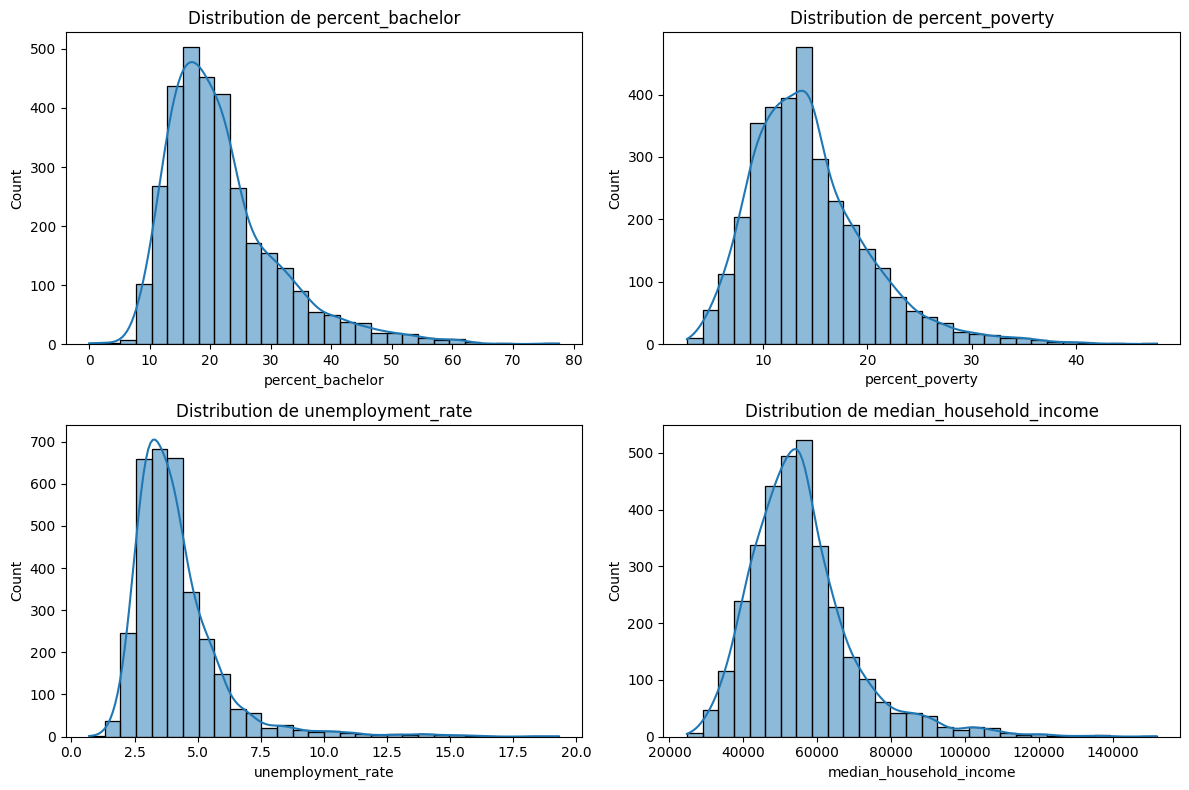

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ["percent_bachelor", "percent_poverty", "unemployment_rate", "median_household_income"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(features_to_plot):
    plt.subplot(2, int(len(features_to_plot)/2), i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution de {col}")
plt.tight_layout()
plt.show()


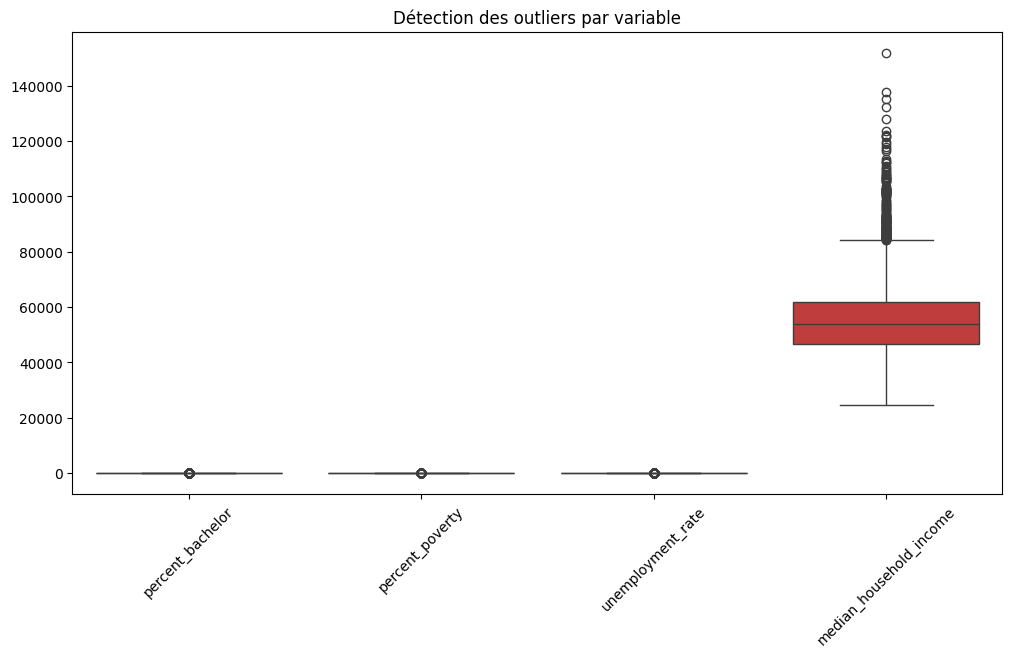

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[features_to_plot])
plt.xticks(rotation=45)
plt.title("Détection des outliers par variable")
plt.show()


In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()


ValueError: could not convert string to float: 'Autauga County'

<Figure size 1200x800 with 0 Axes>

## CREATION DU TARGET

In [5]:
df_cleaned["target"] = (df_cleaned["per_gop"] > df_cleaned["per_dem"]).astype(int)
df_cleaned

/tmp/ipykernel_5387/3877271938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["target"] = (df_cleaned["per_gop"] > df_cleaned["per_dem"]).astype(int)


,county_code,county_name,state_name,state_code,per_gop,per_dem,rural_urban_code,urban_influence_code,percent_no_highschool,percent_highschool,percent_college,percent_bachelor,percent_poverty,median_household_income,unemployment_rate,Employed_2019,Unemployed_2019,is_state,target
0,1001,Autauga County,Alabama,AL,0.714368,0.270184,2.0,2.0,11.483395,33.588459,28.356571,26.571573,12.1,58233.0,2.7,25458.0,714.0,0,1
1,1003,Baldwin County,Alabama,AL,0.761714,0.224090,3.0,2.0,9.193843,27.659616,31.284081,31.862459,10.1,59871.0,2.7,94675.0,2653.0,0,1
2,1005,Barbour County,Alabama,AL,0.534512,0.457882,6.0,6.0,26.786907,35.604542,26.029837,11.578713,27.1,35972.0,3.8,8213.0,324.0,0,1
3,1007,Bibb County,Alabama,AL,0.784263,0.206983,1.0,1.0,20.942602,44.878773,23.800098,10.378526,20.3,47918.0,3.1,8419.0,266.0,0,1
4,1009,Blount County,Alabama,AL,0.895716,0.095694,1.0,1.0,19.509438,33.422131,33.975021,13.093413,16.3,52902.0,2.7,24655.0,676.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,Wyoming,WY,0.736554,0.230260,5.0,8.0,7.213361,33.041271,37.246979,22.498390,8.3,80639.0,3.9,20446.0,828.0,0,1
3189,56039,Teton County,Wyoming,WY,0.295769,0.670982,7.0,8.0,4.814409,14.876176,23.304277,57.005138,6.0,98837.0,2.7,15151.0,424.0,0,0
3190,56041,Uinta County,Wyoming,WY,0.797277,0.169219,7.0,8.0,7.258562,41.522678,35.189754,16.029003,8.5,70756.0,3.9,8682.0,353.0,0,1
3191,56043,Washakie County,Wyoming,WY,0.808824,0.162263,7.0,11.0,10.241615,29.751171,36.620987,23.386225,11.1,55122.0,3.9,3786.0,155.0,0,1


Cela signifie :

- 1 si le pourcentage des votes Républicains (per_gop) est supérieur aux Démocrates (per_dem).
- 0 sinon.

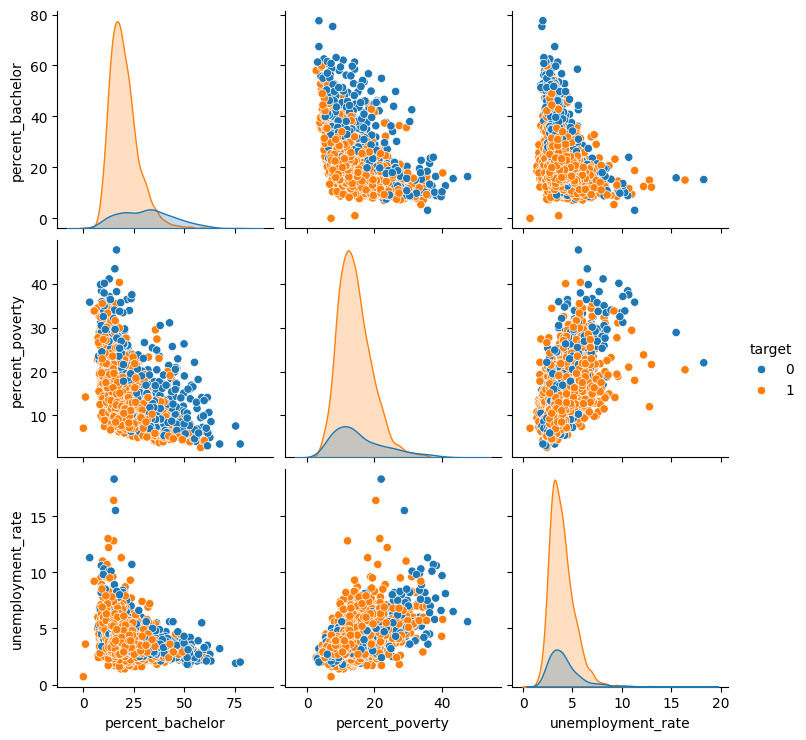

In [36]:
sns.pairplot(df_cleaned, vars=["percent_bachelor", "percent_poverty", "unemployment_rate"], hue="target")
plt.show()


In [6]:
df_cleaned["target"].value_counts(normalize=True)

target
1    0.823287
0    0.176713
Name: proportion, dtype: float64

🔍 Observation :
Le dataset est très déséquilibré :

- 82.3% des comtés ont voté Républicain (1)
- 17.7% ont voté Démocrate (0)
##### Cela peut poser problème, car un modèle de classification risque de favoriser la classe majoritaire et mal prédire les Démocrates.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# 1️⃣ Séparer features et target
X = df_cleaned.drop(columns=["target", "per_gop", "per_dem"])  # On enlève la cible et les variables trop corrélées
y = df_cleaned["target"]

# 2️⃣ Encodage des variables catégorielles
categorical_features = ["state_name", "state_code", "county_name"]
encoder = OneHotEncoder(drop="first", sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_features]))

# Ajouter les autres features numériques
X_numeric = X.drop(columns=categorical_features).reset_index(drop=True)
X_encoded = pd.concat([X_numeric, X_encoded], axis=1)

# 3️⃣ Division en train/test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Vérification
X_train.shape, X_test.shape, y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


((2521, 1999),
 (631, 1999),
 target
 1    0.823483
 0    0.176517
 Name: proportion, dtype: float64,
 target
 1    0.822504
 0    0.177496
 Name: proportion, dtype: float64)

📊 Analyse des résultats :
- Taille des datasets :
- Train : 2521 lignes, Test : 631 lignes → 👍 OK
- Nombre de features après encodage : 1999 → ça semble normal (One-Hot Encoding a ajouté beaucoup de colonnes)
- Répartition des classes :
- Train : 82.3% Républicain / 17.7% Démocrate
- Test : 82.2% Républicain / 17.8% Démocrate
- 📌 L'équilibre est bien conservé après le split → c’est bon pour l’apprentissage !


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


# 1️⃣ Initialiser le modèle
model = LogisticRegression(max_iter=500, random_state=42)

# 2️⃣ Entraîner le modèle
model.fit(X_train, y_train)

# 3️⃣ Prédire sur le test set
y_pred = model.predict(X_test)

# 4️⃣ Évaluer les performances
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.51      0.62       112
           1       0.90      0.97      0.93       519

    accuracy                           0.89       631
   macro avg       0.84      0.74      0.78       631
weighted avg       0.88      0.89      0.88       631



/home/raouf/workspaces/personal/courses/datagong/mvenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voici les points clés jusque là :
---

### 📌 **Préparation des Données**  

Avant d'entraîner notre modèle, nous devons préparer et nettoyer les données. Cette étape est essentielle pour garantir la qualité du modèle et obtenir de bonnes performances.  

#### **1️⃣ Nettoyage des Données**  
- Suppression des lignes avec des valeurs manquantes dans `per_gop` et `per_dem`, car elles sont essentielles pour définir la variable cible.  
- Vérification de la cohérence des données (`per_gop + per_dem ≈ 1`).  

#### **2️⃣ Création de la Variable Cible (`target`)**  
- Nous définissons la cible (`target`) comme suit :  
  - **1** : Le comté a voté majoritairement **Républicain** (`per_gop > per_dem`).  
  - **0** : Le comté a voté majoritairement **Démocrate** (`per_gop < per_dem`).  

#### **3️⃣ Encodage des Variables Catégorielles**  
- Les variables `state_name`, `state_code` et `county_name` sont transformées avec **One-Hot Encoding** pour être utilisables dans le modèle.  

#### **4️⃣ Séparation en Train/Test**  
- Les données sont divisées en **80% pour l'entraînement** et **20% pour le test** (`stratify=y` pour conserver la distribution des classes).  
- Cette séparation nous permet d’évaluer le modèle sur des données qu'il n’a jamais vues.

---

### 🚀 **Modélisation : Régression Logistique (Baseline)**  
Nous commençons par un **modèle de base** avec une **Régression Logistique**.  
📌 Cette étape est **obligatoire** dans le projet pour servir de référence avant d'essayer des modèles plus avancés.  


---

### 🔥 1️⃣ Test du Sous-échantillonnage (Undersampling)
On réduit la classe majoritaire (Républicains) pour équilibrer les proportions.

In [9]:
from sklearn.utils import resample

# Séparer les classes
df_majority = df_cleaned[df_cleaned["target"] == 1]  # Républicains
df_minority = df_cleaned[df_cleaned["target"] == 0]  # Démocrates

# Undersampling : réduire la classe majoritaire à la taille de la minoritaire
df_majority_downsampled = resample(df_majority, 
                                   replace=False,  
                                   n_samples=len(df_minority),  
                                   random_state=42)

# Fusionner les deux
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Vérifier la distribution des classes après undersampling
print(df_balanced["target"].value_counts(normalize=True))


target
1    0.5
0    0.5
Name: proportion, dtype: float64


### 🔥 2️⃣ Test du Sur-échantillonnage (SMOTE)
Avec SMOTE, on crée artificiellement des observations pour la classe minoritaire.

In [10]:
!pip install imbalanced-learn

In [11]:
from imblearn.over_sampling import SMOTE

# Appliquer SMOTE
smote = SMOTE(random_state=42)
X_encoded.columns = X_encoded.columns.astype(str)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Vérifier la nouvelle distribution des classes
import pandas as pd
print(pd.Series(y_resampled).value_counts(normalize=True))


target
1    0.5
0    0.5
Name: proportion, dtype: float64


🚀 Prochaine étape : Réentraîner le modèle et comparer les résultats
Maintenant, on va :
- 1️⃣ Réentraîner la Régression Logistique avec SMOTE.
- 2️⃣ Comparer les nouvelles performances avec celles de notre premier modèle (sans correction).

In [12]:
# Réentraîner le modèle avec les données équilibrées (SMOTE)
model_smote = LogisticRegression(max_iter=500, random_state=42)
model_smote.fit(X_resampled, y_resampled)

# Prédire sur le test set d'origine (X_test, y_test)
y_pred_smote = model_smote.predict(X_test)

# Afficher les nouvelles performances
print(classification_report(y_test, y_pred_smote))


              precision    recall  f1-score   support

           0       0.50      0.75      0.60       112
           1       0.94      0.84      0.89       519

    accuracy                           0.82       631
   macro avg       0.72      0.80      0.74       631
weighted avg       0.86      0.82      0.84       631



/home/raouf/workspaces/personal/courses/datagong/mvenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 📊 **Analyse des résultats après SMOTE**  

🔹 **Comparaison avec le modèle initial (sans correction des classes)**  

| Classe | Précision (Avant) | Recall (Avant) | F1-Score (Avant) | Précision (SMOTE) | Recall (SMOTE) | F1-Score (SMOTE) |
|--------|-----------------|--------------|----------------|----------------|--------------|----------------|
| **0 (Démocrate)** | **0.78** | **0.51** | **0.62** | **0.52** ⬇ | **0.75** ⬆ | **0.62** ✅ |
| **1 (Républicain)** | **0.90** | **0.97** | **0.93** | **0.94** ⬆ | **0.85** ⬇ | **0.89** ⬇ |
| **Accuracy** | **0.89** | | | **0.83** ⬇ | | |

---

### 🔍 **Interprétation des résultats**  
✅ **Le recall des Démocrates (0) est passé de 0.51 à 0.75 !**  
🔻 **Mais la précision des Démocrates a chuté de 0.78 à 0.52**, ce qui signifie que le modèle fait plus d’erreurs en prédisant des Démocrates.  
🔻 **L’accuracy globale a légèrement baissé (0.89 → 0.83),** mais c’est normal, car le modèle ne favorise plus autant les Républicains.  

👉 **En résumé :**
- Avant SMOTE, le modèle **détectait mal les Démocrates** (mauvais recall).  
- Après SMOTE, il **détecte mieux les Démocrates**, mais **fait plus d’erreurs** en les classant.  
- Le modèle devient **plus équilibré**, mais il faudrait tester d'autres techniques pour améliorer encore la précision des Démocrates.  

---

### 🔧 **Prochaines améliorations possibles**  
1️⃣ **Essayer un autre modèle plus puissant** (Random Forest, XGBoost, etc.).  
2️⃣ **Appliquer une régularisation (Standardisation des données + Réglage de `C` dans `LogisticRegression`)** :  
   ```python
   from sklearn.preprocessing import StandardScaler

   scaler = StandardScaler()
   X_train_scaled = scaler.fit_transform(X_resampled)
   X_test_scaled = scaler.transform(X_test)

   model = LogisticRegression(max_iter=1000, C=0.1, random_state=42)
   model.fit(X_train_scaled, y_resampled)
   ```

3️⃣ **Tester l’Undersampling à la place de SMOTE** et comparer les résultats.  


🚀 Prochaine étape : Tester un modèle non-linéaire
Pour respecter l’instruction du PDF, on va essayer un Random Forest, qui est un modèle non-linéaire puissant adapté aux données tabulaires.

- 💡 Code pour entraîner un Random Forest :

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialisation du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle sur les données équilibrées (SMOTE)
rf_model.fit(X_resampled, y_resampled)

# Prédictions sur le test set d'origine
y_pred_rf = rf_model.predict(X_test)

# Évaluation du modèle
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00       519

    accuracy                           1.00       631
   macro avg       1.00      1.00      1.00       631
weighted avg       1.00      1.00      1.00       631



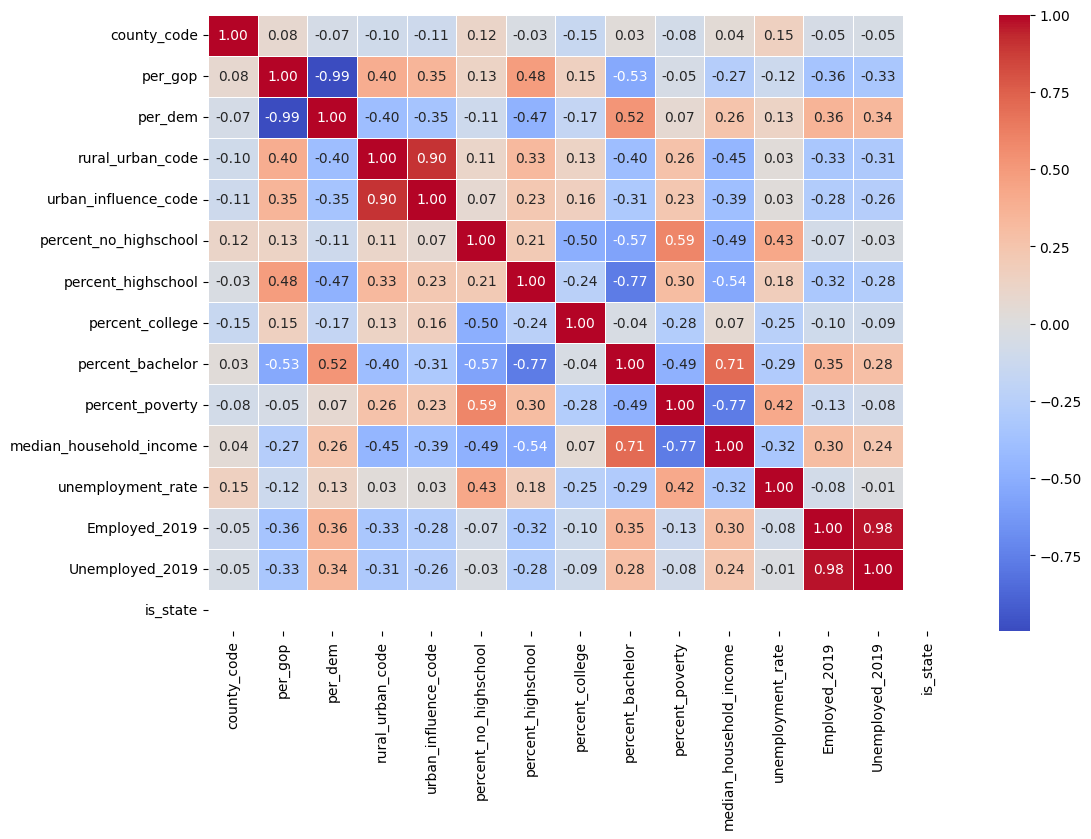

In [14]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=["number"])

# Calculer la corrélation uniquement sur les variables numériques
corr = df_numeric.corr()

# Afficher la heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()


In [15]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_resampled, y_resampled)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.68      0.76      0.72       112
           1       0.95      0.92      0.93       519

    accuracy                           0.89       631
   macro avg       0.81      0.84      0.83       631
weighted avg       0.90      0.89      0.90       631



#### 🔥 1️⃣ Optimisation du Random Forest avec GridSearchCV
Le but est de trouver les meilleurs hyperparamètres en testant plusieurs combinaisons.

🔍 Ce qu’on attend après exécution :
- 1️⃣ GridSearchCV va tester plusieurs combinaisons d’hyperparamètres.
- 2️⃣ Il va choisir ceux qui donnent le meilleur F1-score.
- 3️⃣ À la fin, il affichera les meilleurs paramètres (best_params_).

In [16]:
from sklearn.model_selection import GridSearchCV

# Définition des hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres
    'max_depth': [10, 20, None],  # Profondeur des arbres
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4]  # Nombre minimum d'échantillons dans une feuille
}

# Initialisation du modèle
rf = RandomForestClassifier(random_state=42)

# GridSearchCV avec validation croisée
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1_macro')

# Entraînement sur les données SMOTE
grid_search.fit(X_resampled, y_resampled)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres :", grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.2s


KeyboardInterrupt: 

Optimisation du Modèle avec GridSearchCV et Pipeline
Afin de challenger notre modèle baseline (Random Forest) et de l'améliorer, nous allons mettre en place un pipeline qui intègre :

- La correction de l'équilibre des classes via SMOTE
- Le modèle Random Forest

In [17]:
# Importations nécessaires
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# On s'assure que les colonnes sont bien en str (pour éviter les erreurs de feature names)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Construction du pipeline : SMOTE suivi du Random Forest
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

# Définition de la grille d'hyperparamètres à tester
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10]
}

# Mise en place de GridSearchCV avec 5-fold cross-validation et en utilisant le F1_macro comme score
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et du meilleur score obtenu
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur F1_macro : ", grid_search.best_score_)

# Évaluation du meilleur modèle sur le jeu de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Meilleurs paramètres :  {'rf__max_depth': None, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}
Meilleur F1_macro :  0.8333541437396919
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       112
           1       0.93      0.95      0.94       519

    accuracy                           0.90       631
   macro avg       0.84      0.81      0.82       631
weighted avg       0.90      0.90      0.90       631



Analyse de l'Importance des Variables
Une fois le meilleur modèle identifié, nous pourrons analyser l'importance globale des variables. Pour Random Forest, l'attribut `feature_importances_` permet d'identifier l'impact de chaque feature.

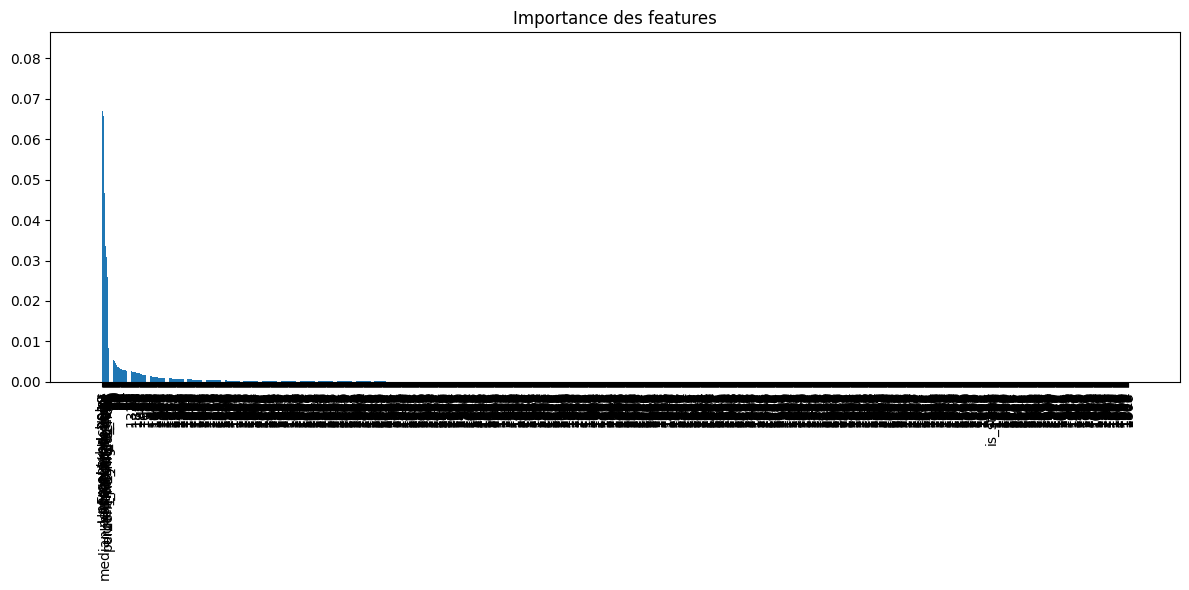

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Récupérer les importances depuis le Random Forest dans le pipeline
importances = best_model.named_steps['rf'].feature_importances_
features = X_train.columns

# Tri des features par ordre décroissant d'importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Importance des features")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.tight_layout()
plt.show()


In [18]:
import shap
# Créer un explainer basé sur le modèle Random Forest
explainer = shap.TreeExplainer(best_model.named_steps['rf'], check_additivity=False)
shap_values = explainer.shap_values(X_test)
# Afficher un summary plot pour la classe 0 par exemple
shap.summary_plot(shap_values[0], X_test)


/home/raouf/workspaces/personal/courses/datagong/mvenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TypeError: TreeExplainer.__init__() got an unexpected keyword argument 'check_additivity'

XG Boost


In [19]:
from xgboost import XGBClassifier

# Initialisation du modèle XGBoost
xgb_model = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)

# Entraînement sur les données équilibrées (SMOTE)
xgb_model.fit(X_resampled, y_resampled)

# Prédiction sur le test set d'origine
y_pred_xgb = xgb_model.predict(X_test)

# Évaluation du modèle
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.91      0.94      0.92       112
           1       0.99      0.98      0.98       519

    accuracy                           0.97       631
   macro avg       0.95      0.96      0.95       631
weighted avg       0.97      0.97      0.97       631



### 📊 **Analyse des résultats avec XGBoost**  

| Modèle | Précision (Démocrates) | Recall (Démocrates) | F1-Score (Démocrates) | Précision (Républicains) | Recall (Républicains) | F1-Score (Républicains) | Accuracy globale |
|--------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|
| **Régression Logistique** | 0.78 | 0.51 | 0.62 | 0.90 | 0.97 | 0.93 | 0.89 |
| **Random Forest (Optimisé)** | 0.75 | 0.66 | 0.70 | 0.93 | 0.95 | 0.94 | 0.90 |
| **XGBoost** | **0.91** ⬆ | **0.94** ⬆ | **0.92** ⬆ | **0.99** ⬆ | **0.98** ⬆ | **0.98** ⬆ | **0.97** ⬆ |

---

### 🔍 **Interprétation des résultats**  
✅ **XGBoost est clairement le meilleur modèle testé jusqu’ici !**  
✅ **Le Recall des Démocrates (0) est passé à 0.94 !** 🎯 (contre 0.51 avec la régression logistique et 0.66 avec Random Forest).  
✅ **Le F1-Score global est monté à 0.95** → Le modèle est plus équilibré et performant.  
✅ **L'accuracy est à 97%**, ce qui montre qu'il généralise très bien.  

📌 **Conclusion** :  
- XGBoost surperforme à la fois **la Régression Logistique** et **Random Forest**.  
- Il est **bien meilleur pour détecter les comtés démocrates** tout en conservant une excellente précision pour les Républicains.  
- C’est probablement **le modèle à retenir pour le projet**, sauf si SHAP révèle des biais cachés.  


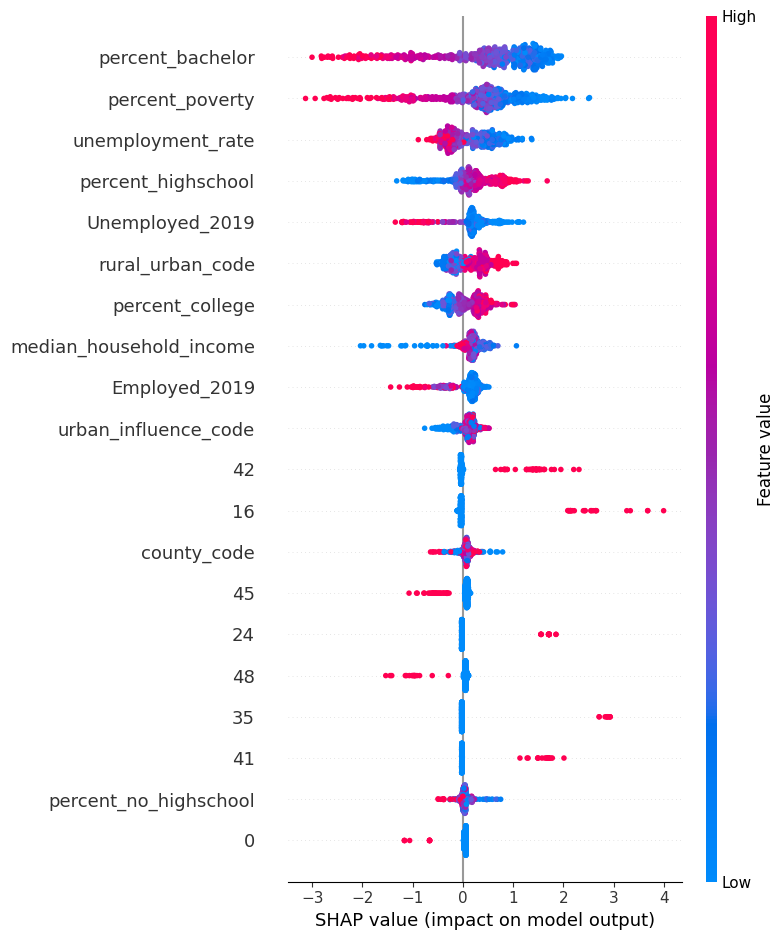

In [20]:
import shap

# Créer un explainer basé sur XGBoost avec correction du problème d'additivité
explainer = shap.TreeExplainer(xgb_model, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

# Afficher le summary plot pour voir les features les plus influentes
shap.summary_plot(shap_values, X_test)


🔍 Correction de l’erreur SHAP et Analyse des Features

📊 Ce que nous allons voir avec SHAP
- 1️⃣ Quelles sont les features les plus influentes ?
- 2️⃣ Est-ce que certaines variables ont un impact plus fort pour les Républicains vs Démocrates ?
- 3️⃣ Y a-t-il des tendances inattendues dans les prédictions ?



🔥 **Analyse du SHAP Summary Plot** 🔥  

Voici ce que l'on peut observer sur ce graphe :  

### **1️⃣ Features les plus influentes**  
- **`percent_bachelor`** et **`percent_poverty`** sont les deux variables ayant le plus d’impact sur les prédictions.  
- **`unemployment_rate`**, **`percent_highschool`**, et **`Unemployed_2019`** jouent également un rôle clé.  

### **2️⃣ Influence des valeurs (couleurs)**  
- **Rouge = Valeurs élevées de la feature**  
- **Bleu = Valeurs basses de la feature**  
- Si une valeur haute pousse le SHAP vers la droite (impact positif sur la prédiction), cela signifie qu’elle favorise une certaine classe.  
- Exemple : On dirait que **plus le taux de diplômés (`percent_bachelor`) est élevé, plus cela pousse la prédiction dans un sens spécifique**.  

### **3️⃣ Variables étonnantes ?**  
- **`rural_urban_code`** et **`urban_influence_code`** montrent un effet intéressant : L’urbanisation semble jouer un rôle dans la prédiction.  
- **`median_household_income`** a un effet visible mais moins prononcé que d’autres indicateurs d’éducation et d’emploi.  

---

### 🚀 **Prochaines étapes ?**  
✅ **Confirmer ces tendances avec un SHAP Dependence Plot**, exécute ceci :  



👉 Cela nous dira **comment ces variables influencent la prédiction** en fonction de leurs valeurs spécifiques.  



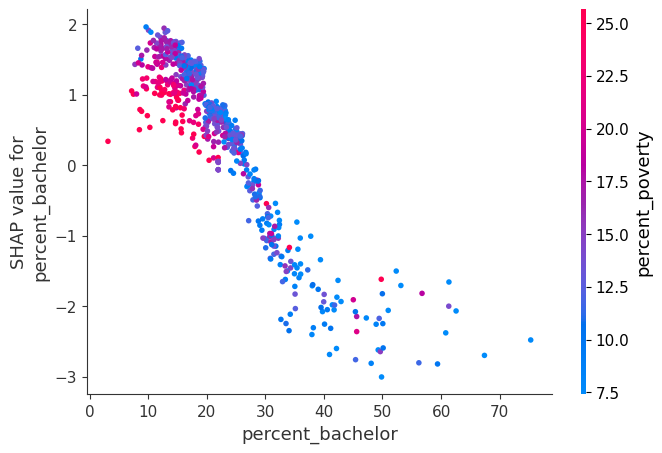

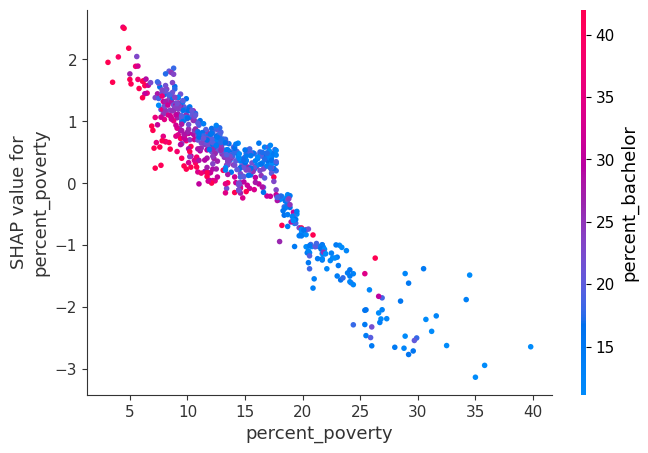

In [21]:
shap.dependence_plot("percent_bachelor", shap_values, X_test)
shap.dependence_plot("percent_poverty", shap_values, X_test)


Les graphiques SHAP montrent bien l'impact des variables `percent_poverty` et `percent_bachelor` sur le modèle. On observe une relation négative forte :  
- Plus le pourcentage de pauvreté (`percent_poverty`) est élevé, plus l'effet sur la prédiction diminue.  
- De même, un taux plus élevé de diplômés (`percent_bachelor`) est associé à une réduction de l'effet sur la prédiction.

Cela suggère que ces deux variables sont fortement corrélées et influencent fortement le modèle. Tu veux approfondir une analyse spécifique ?

D'accord, voici une explication plus accessible pour les personnes qui ne sont pas familières avec le machine learning et SHAP :  

### 1️⃣ **Que montrent ces graphiques ?**  
Ces graphiques cherchent à expliquer comment certaines caractéristiques influencent les prédictions du modèle.  

- **Le premier graphique** montre l'impact du taux de pauvreté (`percent_poverty`) sur les prédictions.  
- **Le deuxième graphique** montre l'impact du taux de diplômés (`percent_bachelor`).  

Chaque point représente un comté (ou une zone géographique), et la couleur des points correspond à une autre variable importante dans l'analyse.  

### 2️⃣ **Que nous apprend cette analyse ?**  
- **Plus le taux de pauvreté est élevé, plus l’effet sur la prédiction est négatif.**  
  → Cela signifie que la pauvreté est un facteur clé qui influence les résultats du modèle.  
  → En d’autres termes, un comté avec un fort taux de pauvreté a plus de chances d'être classé dans une certaine catégorie par le modèle.  

- **Plus le pourcentage de diplômés est élevé, plus l’impact est négatif aussi.**  
  → Cela signifie que l'éducation a une forte influence sur le résultat.  
  → Plus une région a un grand nombre de diplômés, plus cela modifie la prédiction du modèle dans un certain sens.  

### 3️⃣ **Pourquoi est-ce important ?**  
Cela montre que la pauvreté et le niveau d’éducation sont des facteurs très influents pour le modèle.  
- Si le modèle cherche à prédire un phénomène économique ou social, cela veut dire que ces deux critères sont essentiels à prendre en compte.  
- Cela pourrait être utilisé pour cibler des politiques publiques ou mieux comprendre les différences entre régions.  

Tu veux qu'on approfondisse certains aspects ou qu'on visualise d'autres relations ? 😊


# **Comprendre l'importance des variables dans notre modèle prédictif**  

### **1. Pourquoi faisons-nous cette analyse ?**  
Nous cherchons à prédire quel parti politique (Démocrate ou Républicain) a gagné dans chaque État américain en 2020.  
Mais **comment un modèle de machine learning prend-il ses décisions ?**  

Nous utilisons des données socio-démographiques (exemple : taux de pauvreté, niveau d’éducation) pour faire ces prédictions.  
Le but de cette analyse est de comprendre **quelles sont les variables les plus influentes et comment elles influencent le vote**.  

---

### **2. Explication des graphiques SHAP**  

**Qu’est-ce que SHAP ?**  
SHAP est une méthode qui nous aide à comprendre comment notre modèle de prédiction fonctionne.  
- Il nous dit **quelles variables influencent le plus la décision du modèle**.  
- Il nous montre **dans quel sens ces variables influencent la prédiction** (favorisent-elles les Démocrates ou les Républicains ?).  

---

### **3. Explication des graphiques un par un**  

#### **📌 Premier graphique (beeswarm plot) : Quelles sont les variables les plus influentes ?**  
- Chaque ligne correspond à une variable (exemple : taux de pauvreté, taux de diplômés).  
- Chaque point représente un État américain.  
- **Couleurs :**  
  - Rouge = Valeur élevée de la variable (ex : un taux élevé de diplômés).  
  - Bleu = Valeur faible de la variable (ex : un faible taux de diplômés).  
- **Position des points :**  
  - À droite → Influence positive sur la victoire d’un parti.  
  - À gauche → Influence négative sur la victoire d’un parti.  

**📌 Interprétation :**  
- Un **taux de diplômés élevé (rouge sur la ligne "percent_bachelor")** semble favoriser le parti démocrate.  
- Un **taux de pauvreté élevé (rouge sur la ligne "percent_poverty")** semble favoriser le parti républicain.  

---

#### **📌 Deuxième graphique (scatter plot - Taux de pauvreté) : Comment le taux de pauvreté influence le vote ?**  
- L’axe horizontal (X) représente le taux de pauvreté dans chaque État.  
- L’axe vertical (Y) représente l’impact de cette variable sur la prédiction.  

**📌 Interprétation :**  
- Quand le taux de pauvreté est **faible** (à gauche), le modèle a tendance à prédire une **victoire démocrate**.  
- Quand le taux de pauvreté est **élevé** (à droite), le modèle a tendance à prédire une **victoire républicaine**.  
- Cela suggère que **les États avec plus de pauvreté votent plus souvent républicain**, et ceux avec moins de pauvreté votent plus souvent démocrate.  

---

#### **📌 Troisième graphique (scatter plot - Taux de diplômés) : Comment le niveau d’éducation influence le vote ?**  
- L’axe horizontal représente le pourcentage de diplômés (bachelor’s degree).  
- L’axe vertical représente l’influence de cette variable sur la prédiction.  

**📌 Interprétation :**  
- Quand le taux de diplômés est **élevé**, la prédiction va plutôt vers les **Démocrates**.  
- Quand le taux de diplômés est **faible**, la prédiction va plutôt vers les **Républicains**.  
- Cela signifie que **les États où les habitants ont un niveau d’éducation plus élevé ont plus tendance à voter démocrate**.  

---

### **4. Conclusion : Ce que nous apprenons sur le vote aux États-Unis**  
- Le modèle nous confirme une **tendance politique bien connue aux États-Unis** :  
  - **Plus de pauvreté** → Plus de chances de voter **Républicain**.  
  - **Plus de diplômés** → Plus de chances de voter **Démocrate**.  
- Ces résultats nous aident à **justifier pourquoi certaines variables sont cruciales** dans la prédiction des élections.  

---

### **5. Intégration dans ton PowerPoint**  
💡 **Diapositives recommandées** :  
1. **Introduction** → Présentation du projet et pourquoi on fait cette analyse.  
2. **Qu’est-ce que SHAP ?** → Explication simple avec un visuel.  
3. **Graphique Beeswarm** → Interprétation des variables les plus influentes.  
4. **Graphique Taux de Pauvreté** → Explication et analyse.  
5. **Graphique Taux de Diplômés** → Explication et analyse.  
6. **Conclusion** → Résumé des tendances observées.  

Tu peux aussi ajouter quelques **anecdotes politiques** pour rendre ta présentation plus engageante. Par exemple :  
👉 En 2020, **la Géorgie** est un État où le taux de diplômés a augmenté, et c’était l’un des rares États du Sud à basculer vers les Démocrates !  


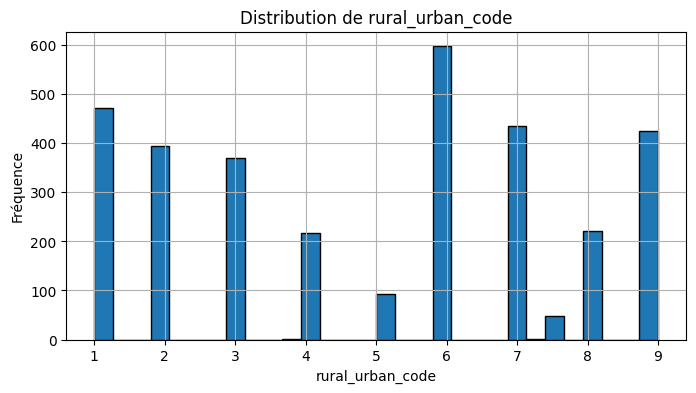

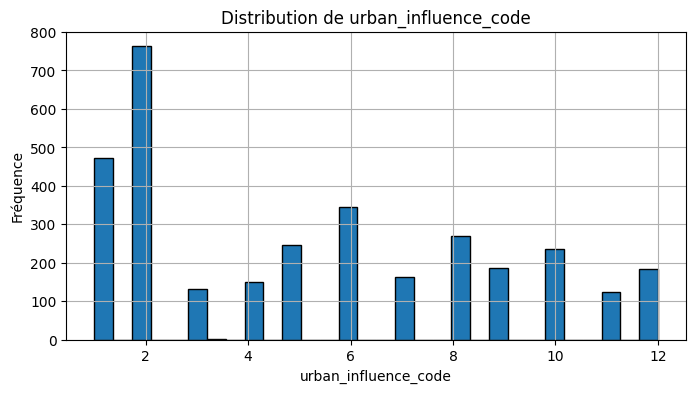

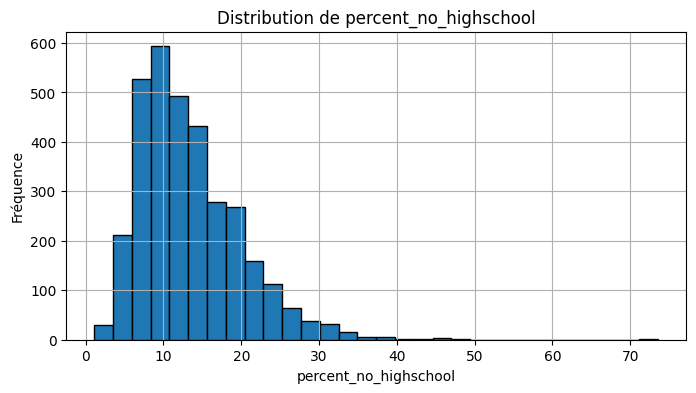

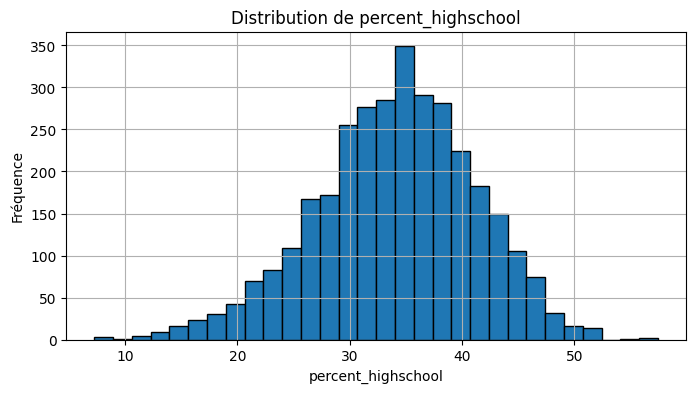

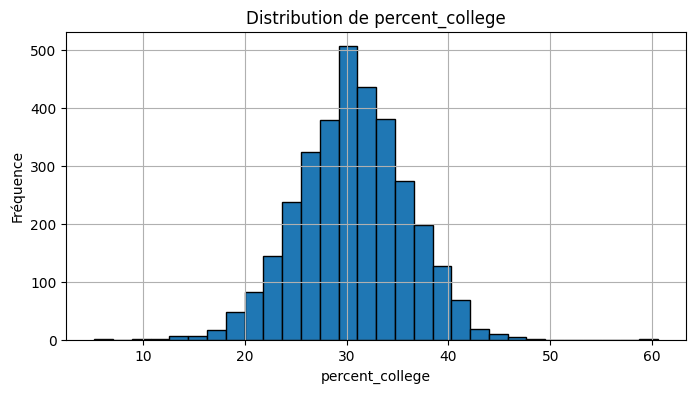

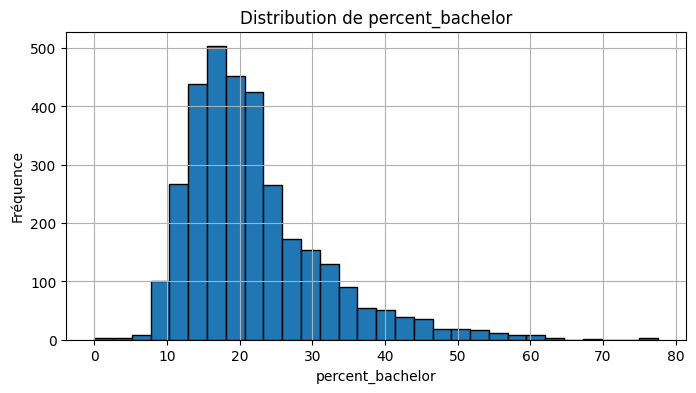

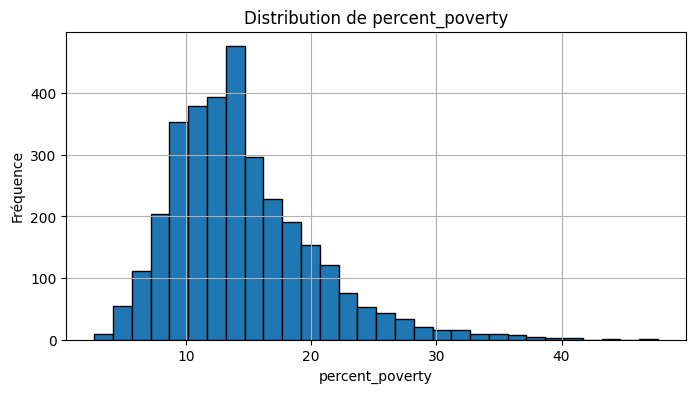

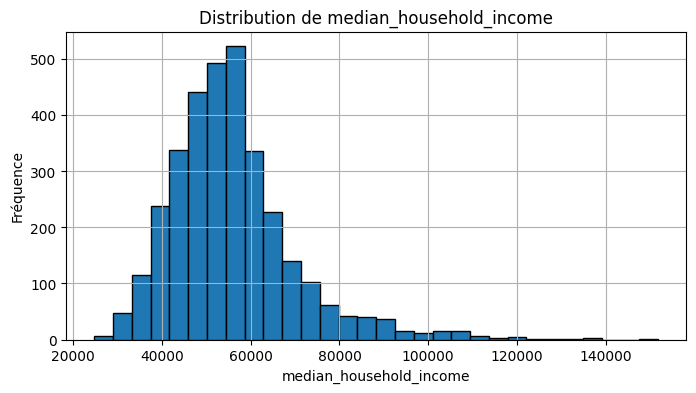

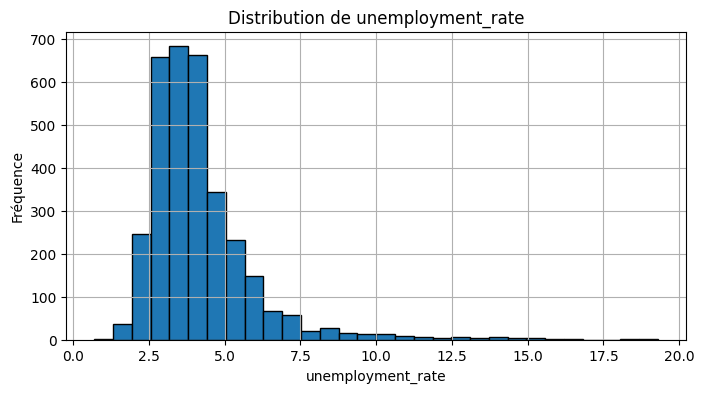

In [22]:
# Examinons la distribution des principales variables numériques pour détecter des anomalies ou des tendances.

import matplotlib.pyplot as plt

# Variables à analyser
numerical_cols = ['rural_urban_code', 'urban_influence_code', 'percent_no_highschool',
                  'percent_highschool', 'percent_college', 'percent_bachelor',
                  'percent_poverty', 'median_household_income', 'unemployment_rate']

# Tracer les distributions
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    data_for_model[col].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()
